## Importar Librerias

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
%matplotlib inline 

## Cargar Data

In [143]:
df=pd.read_table("datafest_train.txt")
df.head(6)

,CODSOLICITUD,RANK_TIP,XB_BURO,CL_VEH_MEAN_st,CAT_ZONA1,FLG_ACTIVACION_0_12,ATR_CO_med_24,dist_ult1_ATR_CO_24_0_100,RT_BAL_CO_MED_3_6,RT_ATR_CO_MAX_3_12,...,UTL_3_TC,UTL_6_TC,UTL1_UTL12_TC,UTL1_UTL24_TC,UTLCS_12_TC_V1,UTLCS_24,UTLCS_24_TC_V1,UTLCS_3_TC,UTLCS_6_TC_V1,VECESCONTINUO
0,24033766,1.TARJERTAS,-3.266796,-0.188999,LIMA_NORTE,1,0.0,NaN,0.946947,NaN,...,0.965991,1.616520,0.239537,0.377730,2.533297,2.209734,2.209734,1.215004,2.293851,24.0
1,24033791,1.TARJERTAS,-3.125401,-0.188999,LIMA_ESTE,0,NaN,NaN,NaN,NaN,...,0.069700,0.088891,0.450273,0.507717,0.530107,0.267532,0.267532,0.251378,0.380865,24.0
2,24033826,1.TARJERTAS,0.000000,-0.188999,PIURA,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.0
3,24033835,1.TARJERTAS,-1.709423,-0.188999,CALLAO,1,NaN,NaN,NaN,NaN,...,3.987447,3.716588,4.711271,5.279689,2.656029,2.276027,2.276027,3.987447,3.716588,24.0
4,24033839,1.TARJERTAS,-3.902042,-0.188999,LORETO,0,NaN,NaN,NaN,NaN,...,0.107676,0.131371,0.717850,0.837214,0.249415,0.206958,0.206958,0.205996,0.241590,24.0
5,24033851,1.TARJERTAS,0.000000,-0.188999,LIMA_SUR,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df.drop(['CODSOLICITUD','RANK_TIP'],axis=1,inplace=True)

## Codificacion de etiquetas

In [145]:
###Codificacion de etiquetas,si el factor es de mas de 10 valores, entonces se tiene que hacer un ajuste
lb_make = LabelEncoder()
df["CAT_ZONA1"] = lb_make.fit_transform(df["CAT_ZONA1"])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## Verificar la distribucion de los valores de la clase

In [146]:
# Label Encoding our target variable 
l=LabelEncoder() 
l.fit(df.FLG_ACTIVACION_0_12) 
l.classes_ 
data_target=Series(l.transform(df.FLG_ACTIVACION_0_12))  #label encoding our target variable 
data_target.value_counts() 

1    153227
0    114597
dtype: int64

In [45]:
###Otra Forma
df.groupby(["FLG_ACTIVACION_0_12"]).size()

FLG_ACTIVACION_0_12
0    114597
1    153227
dtype: int64

In [47]:
###Otra Forma
pd.value_counts(df['FLG_ACTIVACION_0_12'])

1    153227
0    114597
Name: FLG_ACTIVACION_0_12, dtype: int64

In [48]:
df.info()###Caracteristicas del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267824 entries, 0 to 267823
Columns: 395 entries, XB_BURO to CAT_ZONA2
dtypes: float64(393), int64(1), object(1)
memory usage: 807.1+ MB


In [68]:
df.get_dtype_counts()###Contar cuantas variables son de dterminado tipo

float64    393
int64        1
object       1
dtype: int64

## Eliminar Variables con Valores Perdidos

In [147]:
df.isna().sum()###Visualizar Valores faltantes en cada variable

XB_BURO                              0
CL_VEH_MEAN_st                       0
CAT_ZONA1                            0
FLG_ACTIVACION_0_12                  0
ATR_CO_med_24                   226785
dist_ult1_ATR_CO_24_0_100       256979
RT_BAL_CO_MED_3_6               234222
RT_ATR_CO_MAX_3_12              261779
RT_ATR_CO_MAX_3_24              259346
ATR_HI_MAX_3_0                  264230
dist_ult1_ATR_HI_24_0_0         267120
RT_BAL_HI_MED_3_12              264229
RT_BAL_HI_MED_6_12              264063
NUM_TC_min_24                   174897
NUM_TC_sum_24                   174897
LINCRE_TC_max_24                174897
LINCRE_TC_sum_24                174897
FLAGPR_TC_sum_12                174897
ATR_TC_med_12                   174897
BAL_TC_min_12                   174897
ATR_TC_min_3                    176720
dist_primer_ATR_TC_24_0         259425
RT_ATR_TC_MAX_6_24              259666
RT_BAL_TC_MED_12_24             199319
ATR_MAX_3                       162398
ATR_MAX_3_300            

In [148]:
fila=df.shape[0]
columna=df.shape[1]

In [149]:
na=df.isna().sum()###contar los valores nulos por cada columna
porc=(na/fila)*100
# datanew=np.empty((fila, columna))
dataNew=pd.DataFrame()

In [150]:
cont=0
for i in range(df.shape[1]):
    if porc[i]<=30:
        dataNew[df.columns[i]]=np.array(df[df.columns[i]])
        cont=cont+1

In [151]:
dataNew.head(6)

,XB_BURO,CL_VEH_MEAN_st,CAT_ZONA1,FLG_ACTIVACION_0_12,NUMPRODUCTOS_PAS,NUMPRODUCTOS_ACT,NUMPRODUCTOS,MESES_FMACTIVO_24_0,MESES_FMACTIVO_6_1000,MESES_FMPASIVO_6_0,...,SF1_SF24_IND_S_HIP,SF6_SF24_IND_S_HIP,SFENT1_SFENT24,SFENT12_SFENT24,SFENT3_SFENT24,SFENT6_SFENT24,UTL_12_TC,UTL_12_TC_V1,UTL_24_TC,VECESCONTINUO
0,-3.266796,-0.188999,18,1,3.0,1.0,4.0,24.0,6.0,6.0,...,1.124130,0.929361,0.911392,0.911392,0.911392,0.911392,1.719741,1.719741,1.090569,24.0
1,-3.125401,-0.188999,16,0,2.0,1.0,3.0,0.0,0.0,6.0,...,1.264982,1.074186,0.953642,0.953642,0.953642,0.953642,0.108197,0.108197,0.095955,24.0
2,0.000000,-0.188999,24,1,1.0,0.0,1.0,0.0,0.0,3.0,...,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,1.000000,NaN,0.0
3,-1.709423,-0.188999,6,1,1.0,1.0,2.0,0.0,0.0,1.0,...,2.914331,1.617294,1.371429,1.142857,1.142857,0.914286,0.817589,0.817589,0.729567,24.0
4,-3.902042,-0.188999,21,0,1.0,1.0,2.0,0.0,0.0,6.0,...,1.099055,1.257926,1.058824,1.088235,1.294118,1.235294,0.155330,0.155330,0.133184,24.0
5,0.000000,-0.188999,20,1,3.0,0.0,3.0,0.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Imputacion de Valores Perdidos

In [152]:
dataNew2=dataNew.fillna(dataNew.mean())

In [153]:
dataNew2.isnull().sum()

XB_BURO                         0
CL_VEH_MEAN_st                  0
CAT_ZONA1                       0
FLG_ACTIVACION_0_12             0
NUMPRODUCTOS_PAS                0
NUMPRODUCTOS_ACT                0
NUMPRODUCTOS                    0
MESES_FMACTIVO_24_0             0
MESES_FMACTIVO_6_1000           0
MESES_FMPASIVO_6_0              0
MESES_FMPASIVO_12_100           0
MESES_FMPASIVO_6_100            0
MESES_FMPASIVO_24_1000          0
MESES_FMPASIVO_12_1000          0
MESES_FMPASIVO_1_1000           0
MESES_FMSAVMF_24_0              0
MESES_FMSAVMF_24_100            0
MESES_FMSAVMF_12_0              0
MESES_FMSAVMF_12_100            0
MESES_FMSAVMF_6_100             0
MESES_PMSAVMF_24_100            0
MESES_PMSAVMF_12_0              0
MESES_PMSAVMF_12_100            0
MESES_PMSAVMF_6_100             0
FMJUD_count_24                  0
PMSAV_min_24                    0
PMSAV_med_24                    0
PMPASIVO_max_24                 0
PMPASIVO_min_24                 0
PMPASIVO_med_2

In [154]:
dataNew2.to_csv('DataLimpia_Imputada.csv')

In [155]:
dataNew2.shape

(267824, 100)

## Obtener Variables Importantes

In [156]:
from feature_selector import FeatureSelector

In [157]:
x=dataNew2.drop(['FLG_ACTIVACION_0_12'],axis=1)
y=dataNew2.FLG_ACTIVACION_0_12

In [158]:
#Now splitting our dataset into test and train 
from sklearn.model_selection import train_test_split 
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2)

In [159]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = x_tr, labels = y_tr)

### Valores Faltantes

In [105]:
fs.identify_missing (missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



### Valores Unicos

0 features with a single unique value.



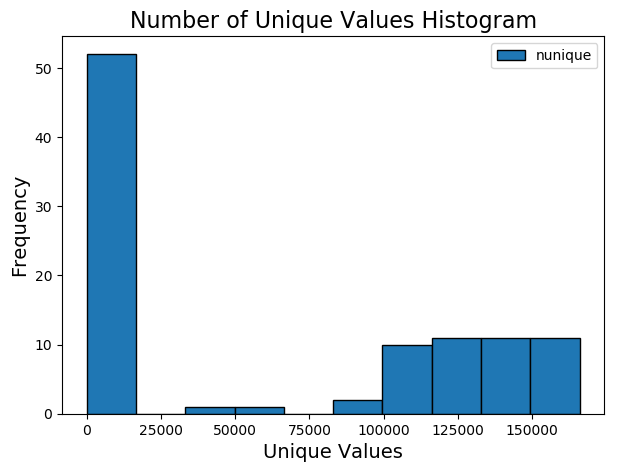

In [106]:
fs.identify_single_unique ()###Para ver variables con valores unicos
fs.plot_unique ()###no entender

### Colineal

In [160]:
fs.identify_collinear (correlation_threshold = 0.99)

1 features with a correlation magnitude greater than 0.99.



In [161]:
collinear_features = fs.ops ['collinear']
collinear_features

['FLG_TC_12']

In [162]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,FLG_TC_12,FLG_REV_12,0.993291


### Importancia Zero

In [163]:
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[595]	valid_0's binary_logloss: 0.59084	valid_0's auc: 0.740527


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000002B5D964A4A8>>
Traceback (most recent call last):
  File "C:\Users\hamil\Anaconda3\lib\site-packages\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[523]	valid_0's binary_logloss: 0.587629	valid_0's auc: 0.743116
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[585]	valid_0's binary_logloss: 0.588952	valid_0's auc: 0.741921
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[830]	valid_0's binary_logloss: 0.592992	valid_0's auc: 0.738789
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[476]	valid_0's binary_logloss: 0.593943	valid_0's auc: 0.737369
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[575]	valid_0's binary_logloss: 0.587958	valid_0's auc: 0.743695
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[401]	valid_0's binary_logloss: 0.590077	valid_0's auc: 0.741772
Training until validat

In [164]:
zero_importance_features = fs.ops ['zero_importance']
zero_importance_features

[]

### Baja Importancia

In [165]:
fs.identify_low_importance (cumulative_importance = 0.99)

88 features required for cumulative importance of 0.99 after one hot encoding.
11 features do not contribute to cumulative importance of 0.99.



In [166]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,CAT_ZONA1,747.9,0.043845,0.043845
1,XB_BURO,528.8,0.031000,0.074845
2,MTOLINTC_PRO24,460.3,0.026984,0.101829
3,MTOTOTDEU_D_I_PRO3,405.8,0.023789,0.125618
4,antiguedad_PAS_TOT,379.9,0.022271,0.147890
5,UTL_24_TC,366.2,0.021468,0.169357
6,RT_FM_PMSAVMF_SUM_24_24,357.2,0.020940,0.190298
7,PMPASIVO_max_24,343.3,0.020125,0.210423
8,MTOLINTOT_DMI0_PRO6,342.5,0.020079,0.230502
9,MTODEUDAMAX24_MTODEUDAACTUAL,327.2,0.019182,0.249683


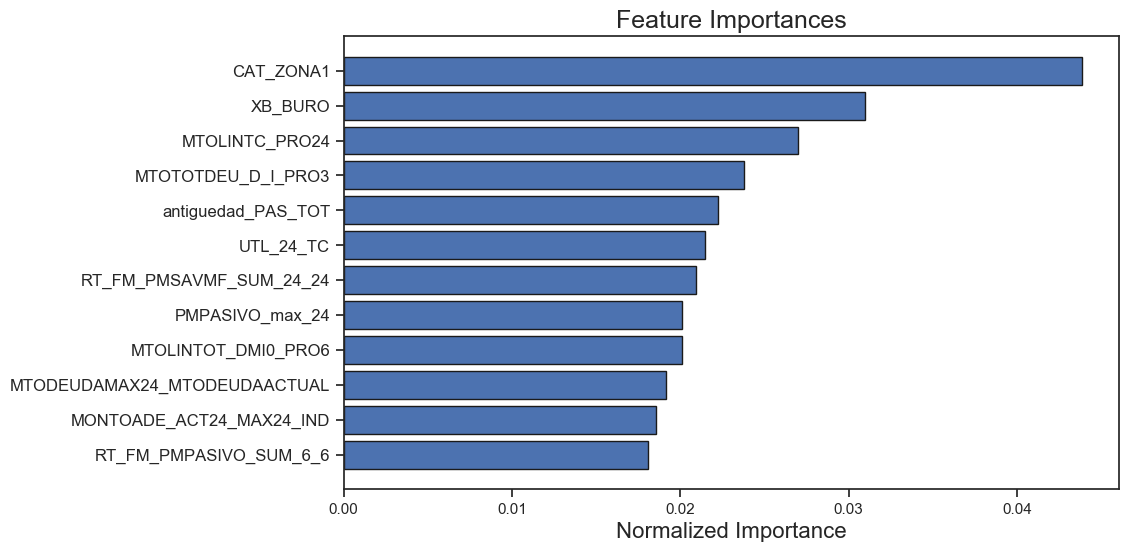

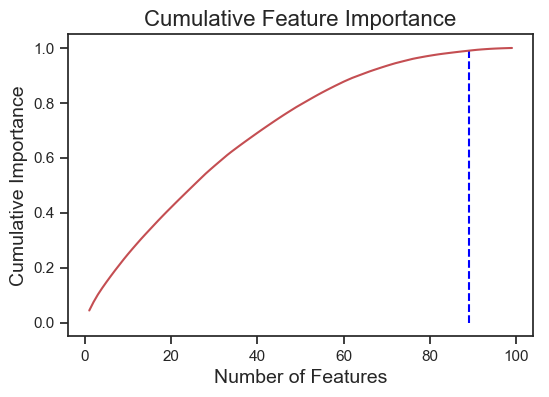

89 features required for 0.99 of cumulative importance


In [167]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

### Combinando Todos los metodos

In [168]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.98, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

2 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[585]	valid_0's binary_logloss: 0.590208	valid_0's auc: 0.741447
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[670]	valid_0's binary_logloss: 0.591393	valid_0's auc: 0.739256
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[459]	valid_0's binary_logloss: 0.590639	valid_0's auc: 0.741632
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[644]	valid_0's binary_logloss: 0.588761	valid_0's auc: 0.742501
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[550]	valid_0's binary_logloss: 0.590757	valid_0's auc: 0.739334


In [169]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['collinear', 'zero_importance', 'low_importance', 'missing', 'single_unique'] methods have been run

Removed 13 features including one-hot features.


In [170]:
dataNew4=pd.DataFrame()
for i in list(train_removed_all.columns):
        dataNew4[i]=np.array(dataNew2[i])

In [171]:
dataNew4.shape

(267824, 86)

In [172]:
dataNew5=pd.DataFrame()
for i in list(fs.feature_importances.feature.iloc[0:50].values):
        dataNew5[i]=np.array(dataNew2[i])

In [173]:
dataNew5.shape

(267824, 50)

## Codificacion en Caliente de las Variables Categoricas  Etiquetadas

### Esto debe de hacerse antes de seleccionar las variables importantes

In [174]:
one_hot_CAT_ZONA1=pd.get_dummies(dataNew4.CAT_ZONA1)

In [175]:
dataNew4.drop(['CAT_ZONA1'],axis=1,inplace=True)

In [176]:
dataNew4=pd.concat([dataNew4,one_hot_CAT_ZONA1],axis=1) 

## Train y Test

#### esto no se corre

In [177]:
#Now splitting our dataset into test and train 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(dataNew4,y,test_size=.3)

## Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [179]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini',max_depth=10,max_features='auto')
rf = rf.fit(x_train, y_train)

###  Accuracy, Matriz Confusion , AUC , Gini

In [181]:
pred_rf = rf.predict(x_test)
pred_rf

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [182]:
for i in range(0, len(y_test)):
    if pred_rf[i]>=0.5:       # setting threshold to .5
        pred_rf[i]=1
    else:  
        pred_rf[i]=0

In [183]:
accuracy_rf=accuracy_score(y_test, pred_rf)
accuracy_rf

0.6624558171952009

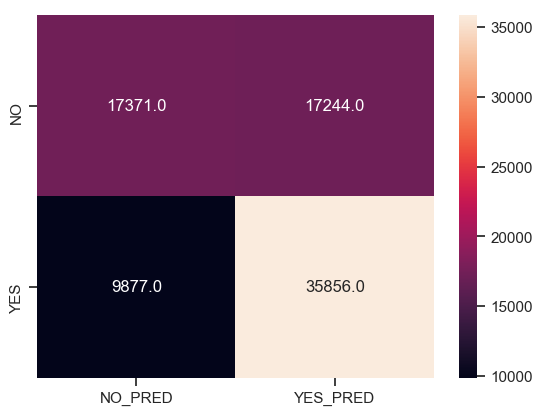

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)
conf = confusion_matrix(y_test, pred_rf, labels = [0,1])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

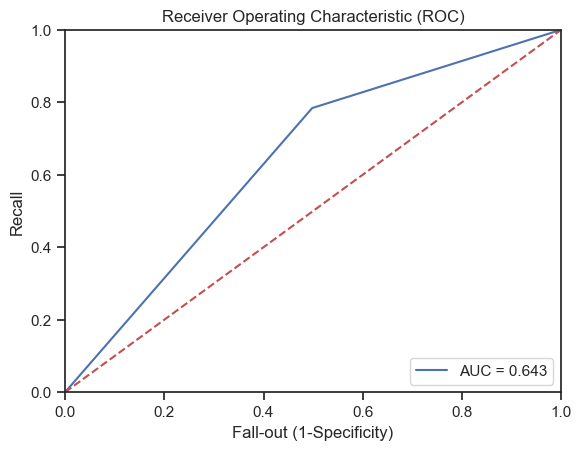

AUC score: 0.6429317514699548


In [185]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, pred_rf)
roc_auc_rf = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()
print('AUC score:', roc_auc_rf)

In [186]:
gini_rf=2*(roc_auc_rf - 0.5) 
gini_rf

0.2858635029399097

## XGBoosting

In [187]:
import xgboost as xgb

In [188]:
dtrain = xgb.DMatrix(x_train, label= y_train)
dtest=xgb.DMatrix(x_test)

In [189]:
parameters = {'max_depth':7,'eta':1,'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [190]:
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop=datetime.now()

In [191]:
execution_time_xgb=stop-start
execution_time_xgb

datetime.timedelta(0, 46, 63637)

In [192]:
pred_xg=xg.predict(dtest)
pred_xg

array([0.64875716, 0.77071345, 0.78431696, ..., 0.6650508 , 0.5825695 ,
       0.4343587 ], dtype=float32)

In [193]:
for i in range(0, len(y_test)):
    if pred_xg[i]>=0.5:       # setting threshold to .5
        pred_xg[i]=1
    else:  
        pred_xg[i]=0

####  Accuracy, Matriz Confusion, Auc, Gini 

In [194]:
from sklearn.metrics import accuracy_score
accuracy_xg=accuracy_score(y_test,pred_xg)
accuracy_xg

0.6732837158361129

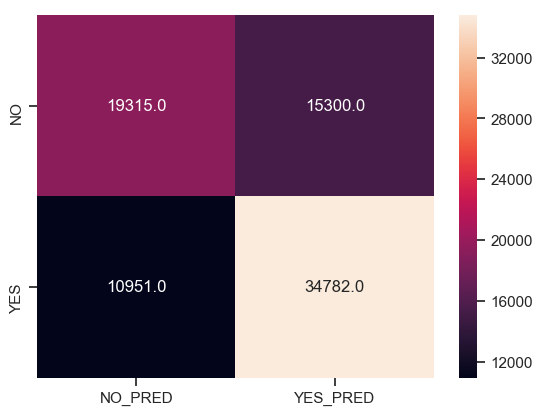

In [195]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)
conf = confusion_matrix(y_test, pred_xg, labels = [0,1])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

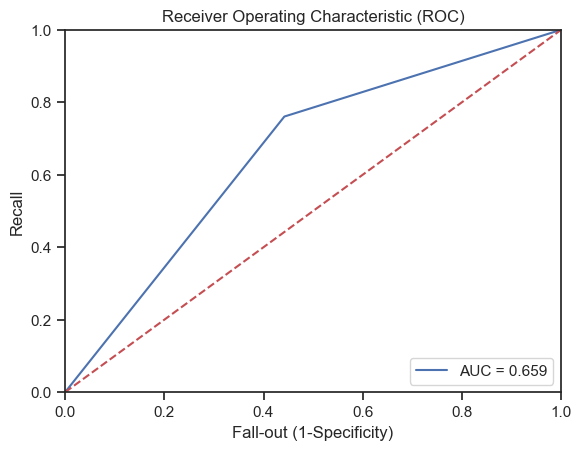

AUC score: 0.6592699953825463


In [196]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, pred_xg)
roc_auc_xg = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_xg)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc_xg)

In [197]:
gini_xg=(roc_auc_xg - 0.5) * 2
gini_xg

0.31853999076509254

## LighGBM

In [198]:
import lightgbm as lgb

In [199]:
train_data=lgb.Dataset(x_train,label = y_train)
param = {'num_leaves':150,'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] =['auc','binary_logloss']

In [200]:
num_round=50
from datetime import datetime
start = datetime.now()
lg=lgb.train(param,train_data,num_round)
stop=datetime.now()

In [201]:
execution_time_lg=stop-start
execution_time_lg

datetime.timedelta(0, 7, 958982)

In [202]:
pred_lg = lg.predict(x_test)
pred_lg

array([0.660675  , 0.77394363, 0.80787305, ..., 0.6425801 , 0.59490405,
       0.47163881])

In [203]:
for i in range(0, len(y_test)):
    if pred_lg[i]>=0.5:       # setting threshold to .5
        pred_lg[i]=1
    else:  
        pred_lg[i]=0

####  Accuracy, Matriz Confusion, Auc, Gini 

In [204]:
from sklearn.metrics import accuracy_score
accuracy_lg=accuracy_score(y_test,pred_lg)
accuracy_lg

0.6729974610444566

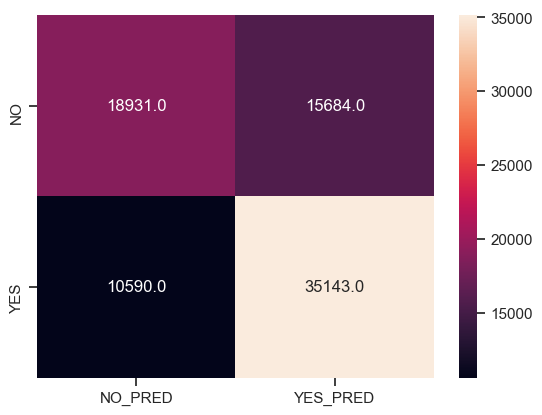

In [205]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)
conf = confusion_matrix(y_test, pred_lg, labels = [0,1])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

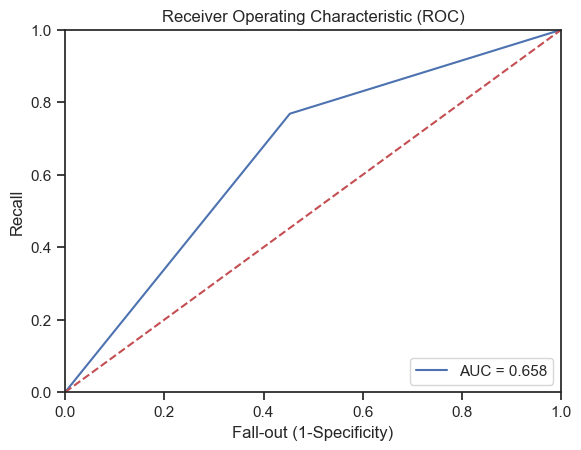

AUC score: 0.657670088855403


In [206]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, pred_lg)
roc_auc_lg = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_lg)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()
print('AUC score:', roc_auc_lg)

In [207]:
gini_lg=(roc_auc_lg - 0.5) * 2
gini_lg

0.315340177710806

## CatBoost

In [208]:
from catboost import CatBoostClassifier

In [209]:
cb = CatBoostClassifier(iterations=250, depth=10, l2_leaf_reg= 9, learning_rate=0.1,
                           loss_function='Logloss', eval_metric='AUC')
#Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll

In [288]:
x_train.shape

(187476, 115)

In [291]:
y_train.shape

(187476,)

In [289]:
a.shape

(187476, 4)

In [290]:
b.shape

(187476,)

In [210]:
cb.fit(x_train, y_train, cat_features=[], eval_set=(x_test, y_test), plot = True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [211]:
pred_cb = cb.predict(x_test, prediction_type='Probability')[:, 1]

In [212]:
pred_cb[1:5]

array([0.82193226, 0.79436184, 0.77611505, 0.60083233])

In [213]:
for i in range(0, len(y_test)):
    if pred_cb[i]>=0.5:       # setting threshold to .5
        pred_cb[i]=1
    else:  
        pred_cb[i]=0

####  Accuracy, Matriz Confusion, Auc, Gini 

In [214]:
from sklearn.metrics import accuracy_score
accuracy_cb=accuracy_score(y_test,pred_cb)
accuracy_cb

0.6813486334445163

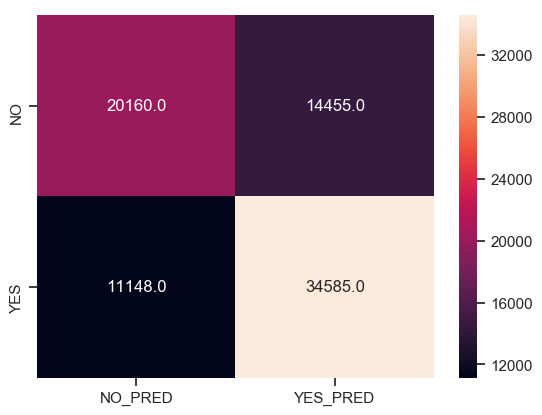

In [215]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)
conf = confusion_matrix(y_test, pred_cb, labels = [0,1])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

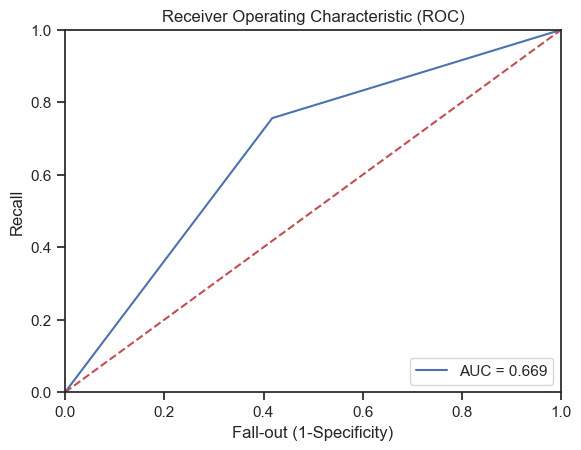

AUC score: 0.6693218807711361


In [216]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, pred_cb)
roc_auc_cb = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_cb)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc_cb)


In [217]:
gini_cb=(roc_auc_cb - 0.5) * 2
gini_cb

0.33864376154227216

In [225]:
(gini_rf,gini_xg,gini_lg,gini_cb)

(0.2858635029399097,
 0.31853999076509254,
 0.315340177710806,
 0.33864376154227216)

## Ensamblados

In [253]:
dataTest=pd.DataFrame(columns=['pred_cb','pred_lg','pred_xg','pred_rf','target'])

In [254]:
dataTest['pred_cb']=np.array(pred_cb.astype('int'))
dataTest['pred_lg']=np.array(pred_lg.astype('int'))
dataTest['pred_xg']=np.array(pred_xg.astype('int'))
dataTest['pred_rf']=np.array(pred_rf.astype('int'))
dataTest['target']=np.array(y_test)

In [255]:
dataTest.head()

,pred_cb,pred_lg,pred_xg,pred_rf,target
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,0


In [277]:
dataTest.dtypes

pred_cb    int32
pred_lg    int32
pred_xg    int32
pred_rf    int32
target     int64
dtype: object

In [247]:
dataTrain=pd.DataFrame(columns=['pred_cb','pred_lg','pred_xg','pred_rf','target'])

In [265]:
pred_cb_Train=cb.predict(x_train)
pred_lg_Train=lg.predict(x_train)
pred_xg_Train=xg.predict(dtrain)
pred_rf_Train=rf.predict(x_train)

In [267]:
for i in range(0, len(y_train)):
    if pred_cb_Train[i]>=0.5:       # setting threshold to .5
        pred_cb_Train[i]=1
    else:  
        pred_cb_Train[i]=0
for i in range(0, len(y_train)):
    if pred_lg_Train[i]>=0.5:       # setting threshold to .5
        pred_lg_Train[i]=1
    else:  
        pred_lg_Train[i]=0
for i in range(0, len(y_train)):
    if pred_xg_Train[i]>=0.5:       # setting threshold to .5
        pred_xg_Train[i]=1
    else:  
        pred_xg_Train[i]=0
for i in range(0, len(y_train)):
    if pred_rf_Train[i]>=0.5:       # setting threshold to .5
        pred_rf_Train[i]=1
    else:  
        pred_rf_Train[i]=0

In [268]:
dataTrain['pred_cb']=np.array(pred_cb_Train.astype('int'))
dataTrain['pred_lg']=np.array(pred_lg_Train.astype('int'))
dataTrain['pred_xg']=np.array(pred_xg_Train.astype('int'))
dataTrain['pred_rf']=np.array(pred_rf_Train.astype('int'))
dataTrain['target']=np.array(y_train)

In [278]:
dataTrain.head()

,pred_cb,pred_lg,pred_xg,pred_rf,target
0,1,1,1,1,1
1,0,0,0,0,1
2,1,0,0,0,1
3,0,0,0,0,0
4,0,0,0,1,1


In [276]:
dataTrain.dtypes

pred_cb    int32
pred_lg    int32
pred_xg    int32
pred_rf    int32
target     int64
dtype: object

In [269]:
from catboost import CatBoostClassifier

In [292]:
cbf = CatBoostClassifier(iterations=250, depth=10, l2_leaf_reg= 9, learning_rate=0.1,
                           loss_function='Logloss', eval_metric='AUC')
#Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll

In [293]:
cbf.fit(dataTrain.drop('target',axis=1), dataTrain.target, cat_features=[], eval_set=(dataTest.drop('target',axis=1), dataTest.target), plot = True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [302]:
pred_cbf = cbf.predict(dataTest.drop('target',axis=1), prediction_type='Probability')[:, 1]
pred_cbf

array([0.52876953, 0.52876953, 0.52876953, ..., 0.52876953, 0.52876953,
       0.53062505])

In [303]:
for i in range(0, len(y_test)):
    if pred_cbf[i]>=0.5:       # setting threshold to .5
        pred_cbf[i]=1
    else:  
        pred_cbf[i]=0

In [305]:
from sklearn.metrics import accuracy_score
accuracy_cbf=accuracy_score(dataTest.target,pred_cbf)
accuracy_cbf

0.6813486334445163

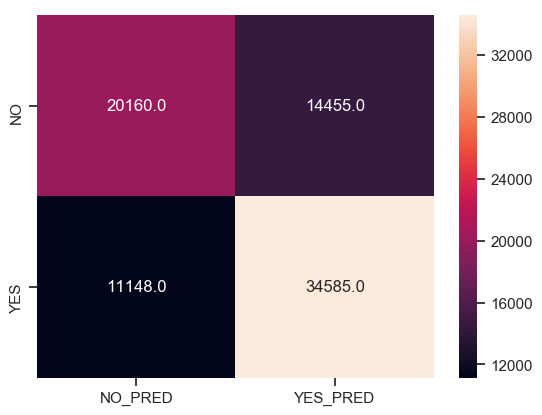

In [306]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)
conf = confusion_matrix(dataTest.target, pred_cbf, labels = [0,1])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

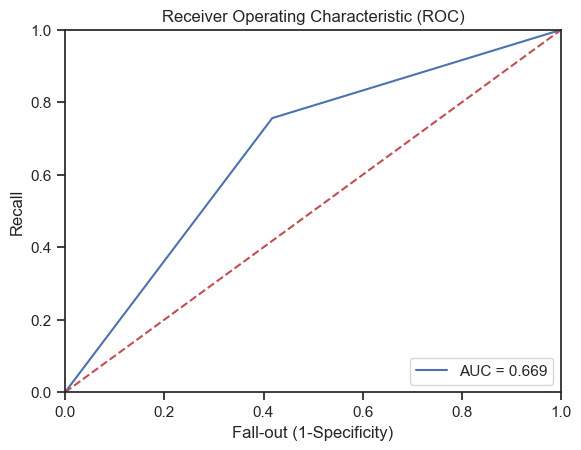

AUC score: 0.6693218807711361


In [307]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

plt.figure()
false_positive_rate, recall, thresholds = roc_curve(dataTest.target, pred_cbf)
roc_auc_cbf = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_cbf)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()
print('AUC score:', roc_auc_cbf)


In [308]:
gini_cbf=(roc_auc_cbf - 0.5) * 2
gini_cbf

0.33864376154227216